# CUSTOMER CHURN 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')



In [2]:
data = pd.read_csv("C:/Users/dell/Desktop/Excel/datagit.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Check is there any missing value

In [4]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Get info about data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Get the number of rows and columns

In [6]:
data.shape

(7043, 21)

## Dropping the Customer Id column

In [7]:
data.drop(["customerID"], axis = 1, inplace=True)

## Check records with missing values in Total Charges

In [8]:
len(data[data['TotalCharges'] == " "])

11

## Convert missing values into numeric

In [9]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors= 'coerce')
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## Filling the null values to its mean value of TotalCharges

In [10]:
data.fillna(data['TotalCharges'].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### Dropping row having tenure < 1

In [11]:
data.drop(labels=data[data['tenure'] == 0].index, axis=0, inplace=True)

## Checking the Unique value in the SeniorCitizen Column

In [12]:
data['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

### Changing the value of Senior Citizen

In [13]:
data['SeniorCitizen'] = data["SeniorCitizen"].map({0 : 'No' , 1 : 'Yes'})
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Checking the Description about the ISP

In [14]:
data['InternetService'].describe(include= ['object','bool'])

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

## Churn Distribution

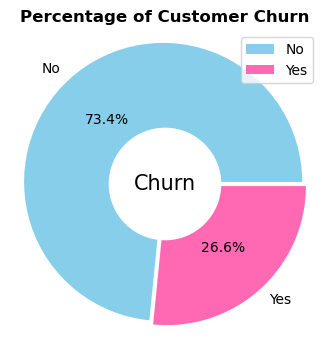

In [15]:
color = ['skyblue','hotpink']
type_ = ["No" ,"Yes"]
explode = [0.02,0.02]

plt.figure(figsize=(4,4))
plt.pie(data["Churn"].value_counts(), colors= color, wedgeprops={'width' : 0.7}, autopct = '%1.1f%%', labels = type_, explode=explode)

circle = plt.Circle((0,0), 0.4, color = 'white')
plt.gca().add_artist(circle)

plt.text(0, 0, "Churn", ha='center', va= 'center', fontsize = 15)

plt.title("Percentage of Customer Churn", fontweight = "bold")
plt.axis('equal')
plt.legend()
plt.show()

## Counting the gender in Churn having No

In [16]:
data[data['Churn'] == "No"]["gender"].value_counts()

gender
Male      2619
Female    2544
Name: count, dtype: int64

## Counting the gender in Churn having Yes

In [17]:
data[data["Churn"] == 'Yes']["gender"].value_counts()

gender
Female    939
Male      930
Name: count, dtype: int64

## Churn Distribution w.r.t Gender

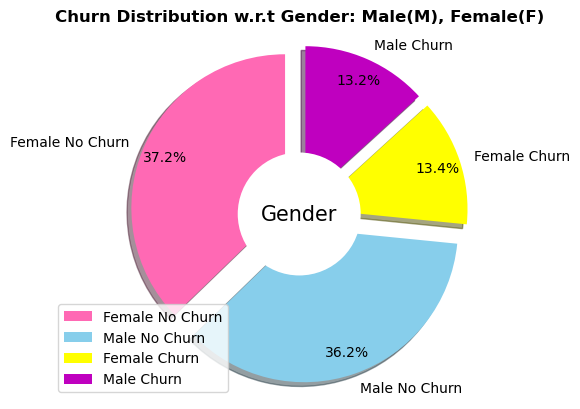

In [18]:
labels = ["Female No Churn", "Male No Churn", "Female Churn", "Male Churn"]
sizes = [2619,2544,939,930]
colors = ['hotpink','skyblue','yellow','m']
explode = [0.1,0.1,0.1,0.1]
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', pctdistance=0.85,startangle=90, explode=explode, shadow= True)
plt.text(0, 0, "Gender", ha='center', va= 'center', fontsize = 15)

centre_circle = plt.Circle((0,0), 0.4, fc='white')

fig = plt.gcf()

fig.gca().add_artist(centre_circle)
plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontweight = "bold")
plt.axis('equal')
plt.legend(labels , loc = 'lower left')
plt.show()

### Contract distribution & its relationship with Churn

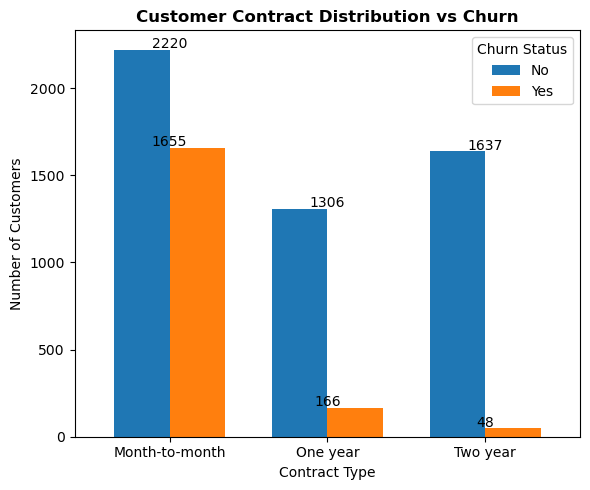

In [19]:
contract_churn = data.groupby(['Contract', 'Churn']).size().unstack(fill_value=0)
contract_churn

#Plotting it into Bar Chart

contract_churn.plot(kind='bar', figsize=(6,5), width=0.7)
# Show numbers of each bars

for i in contract_churn.columns:
    for j in range(len(contract_churn)):
        plt.text(j, contract_churn[i].iloc[j]+10, 
                 contract_churn[i].iloc[j], ha='center')

plt.title("Customer Contract Distribution vs Churn", fontweight='bold')
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.legend(title="Churn Status")
plt.tight_layout()
plt.show()


### CONCLUSION = Customers with monthly contracts were more likely to Churn

# Collecting info about Mode of Payment

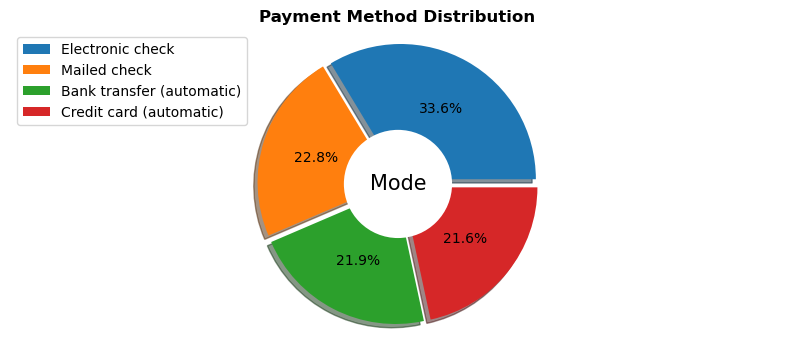

In [20]:
valuess = data["PaymentMethod"].unique()
counts = data["PaymentMethod"].value_counts()
explode = [0.04,0.04,0.04,0.04]

# Creating a pie chart
plt.figure(figsize=(10,4))
plt.pie(counts, autopct="%1.1f%%", explode=explode, shadow= True)

centre_circle = plt.Circle((0,0), 0.4, fc='white')

fig = plt.gcf()

fig.gca().add_artist(centre_circle)

plt.text(0, 0, "Mode", ha='center', va= 'center', fontsize = 15)

plt.axis('equal')
plt.legend(valuess, loc = 'upper left')

plt.title("Payment Method Distribution", fontweight="bold")

plt.show()

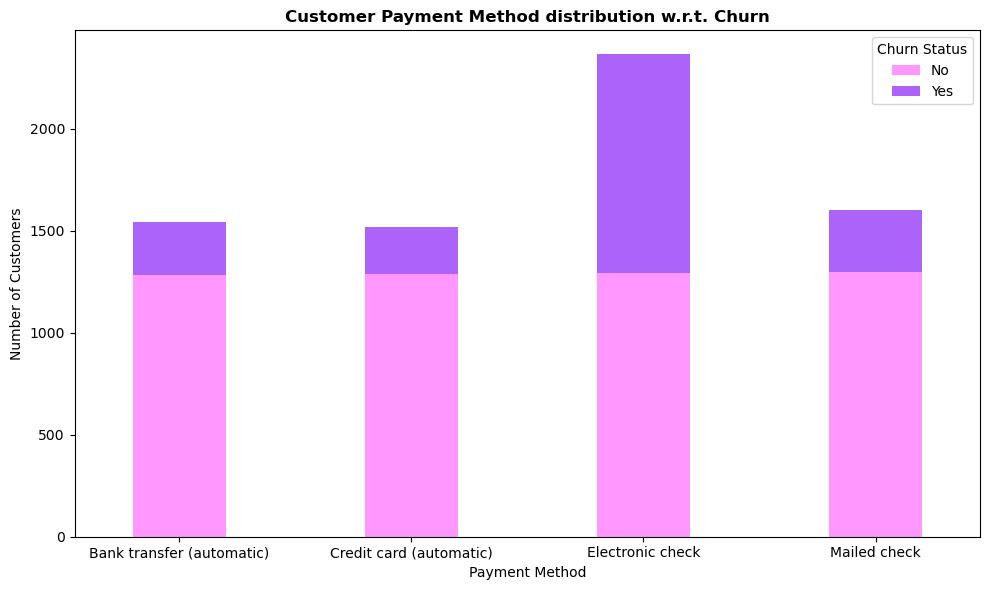

In [21]:
mode_churn = data.groupby(['PaymentMethod', 'Churn']).size().unstack(fill_value=0)

mode_churn.plot(kind='bar', stacked=True, figsize=(10, 6), color=["#FF97FF","#AB63FA"], width = 0.4)

plt.title("Customer Payment Method distribution w.r.t. Churn", fontweight='bold')
plt.xlabel("Payment Method")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0, ha='center')  
plt.legend(title="Churn Status", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

## Counting the gender(Male) as per ISP and Churn

In [22]:
male_count = data[data['gender'] == "Male"][["InternetService", "Churn"]].value_counts()

## Counting the gender(Female) as per ISP and Churn

In [23]:
female_count = data[data['gender'] == "Female"][["InternetService", "Churn"]].value_counts()

## ISP as per Gender-wise customer churn

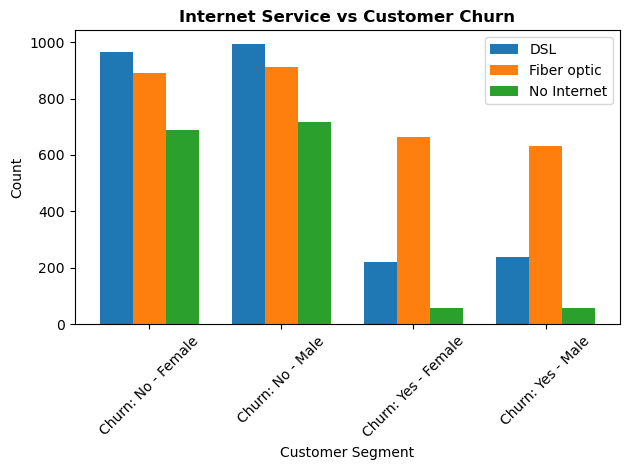

In [24]:
categories = ['Churn: No - Female', 'Churn: No - Male', 'Churn: Yes - Female', 'Churn: Yes - Male']
x = np.arange(len(categories))  
width = 0.25 

dsl = [965, 992, 219, 240]
fiber_optic = [889, 910, 664, 633]
no_internet = [690, 717, 56, 57]

plt.bar(x - width, dsl, width=width, label='DSL')
plt.bar(x, fiber_optic, width=width, label='Fiber optic')
plt.bar(x + width, no_internet, width=width, label='No Internet')

plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.title('Internet Service vs Customer Churn', fontweight = 'bold')
plt.xticks(x, categories, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


## Dependent distribution as per Churn

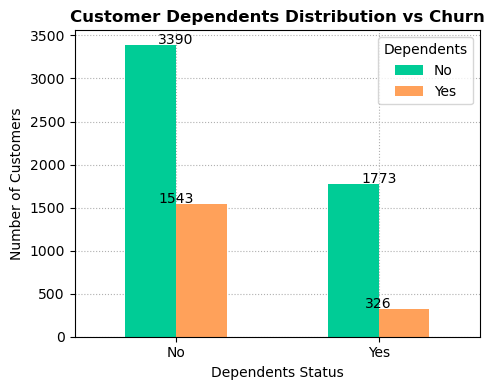

In [25]:
depend_churn = data.groupby(['Dependents', 'Churn']).size().unstack(fill_value=0)
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}

depend_churn.plot(kind='bar', figsize=(5,4), width=0.5, zorder = 2, color = color_map)

for i in depend_churn.columns:
    for j in range(len(depend_churn)):
        plt.text(j, depend_churn[i].iloc[j]+10, 
                 depend_churn[i].iloc[j], ha='center')

plt.title("Customer Dependents Distribution vs Churn", fontweight='bold')

plt.grid(visible= True, ls =":", zorder = 1)
plt.xlabel("Dependents Status")
plt.ylabel("Number of Customers")

plt.xticks(rotation=0)
plt.legend(title="Dependents")

plt.tight_layout()
plt.show()

## Churn Distribution W.r.t Partner

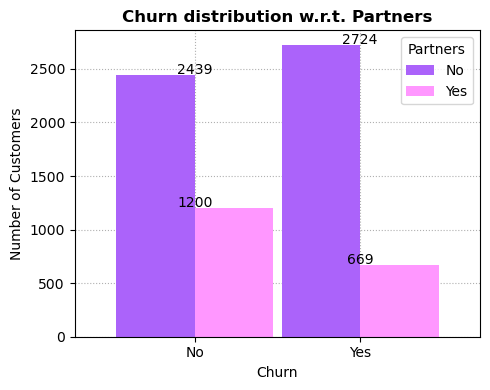

In [26]:
partner_churn = data.groupby(['Partner', 'Churn']).size().unstack(fill_value=0)
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}

partner_churn.plot(kind='bar', figsize=(5,4), width=0.95, zorder = 2, color = color_map, )

for i in partner_churn.columns:
    for j in range(len(partner_churn)):
        plt.text(j, partner_churn[i].iloc[j]+10, 
                 partner_churn[i].iloc[j], ha='center')

plt.title("Churn distribution w.r.t. Partners", fontweight='bold')

plt.grid(visible= True, ls =":", zorder = 1)
plt.xlabel("Churn")
plt.ylabel("Number of Customers")

plt.xticks(rotation=0)
plt.legend(title="Partners", loc = 'upper right')

plt.tight_layout()
plt.show()

In [27]:
SeniorCitizen_churn = data.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)
SeniorCitizen_churn

Churn,No,Yes
SeniorCitizen,,
No,4497,1393
Yes,666,476


## Churn distribution w.r.t. SeniorCitizen

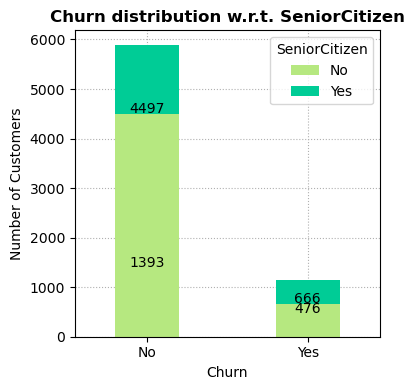

In [28]:
SeniorCitizen_churn = data.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)
color_map = {"Yes": '#00CC96', "No": '#B6E880'}

SeniorCitizen_churn.plot(kind='bar', stacked = True, figsize=(4,4), width=0.4, zorder = 2, color = color_map, )

for i in SeniorCitizen_churn.columns:
    for j in range(len(SeniorCitizen_churn)):
        plt.text(j, SeniorCitizen_churn[i].iloc[j]+10, 
                 SeniorCitizen_churn[i].iloc[j], ha='center')

plt.title("Churn distribution w.r.t. SeniorCitizen", fontweight='bold')

plt.grid(visible= True, ls =":", zorder = 1)
plt.xlabel("Churn")
plt.ylabel("Number of Customers")

plt.xticks(rotation=0)
plt.legend(title="SeniorCitizen", loc = 'upper right')

plt.tight_layout()
plt.show()

In [29]:
OS_churn = data.groupby(['OnlineSecurity', 'Churn']).size().unstack(fill_value=0)
OS_churn

Churn,No,Yes
OnlineSecurity,,
No,2036,1461
No internet service,1407,113
Yes,1720,295


## Churn distribution w.r.t. Online Security

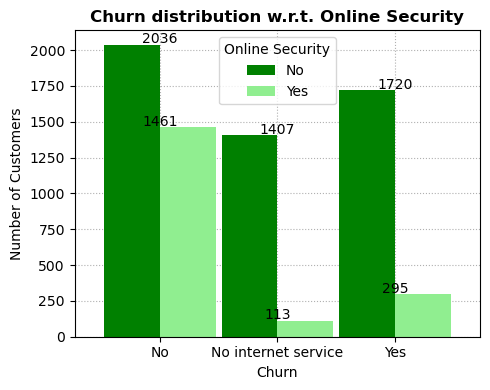

In [30]:
OS_churn = data.groupby(['OnlineSecurity', 'Churn']).size().unstack(fill_value=0)
color_map = {"Yes": "lightgreen", "No": "green"}

OS_churn.plot(kind='bar', figsize=(5,4), width=0.95, zorder = 2, color = color_map, )

for i in OS_churn.columns:
    for j in range(len(OS_churn)):
        plt.text(j, OS_churn[i].iloc[j]+10, 
                 OS_churn[i].iloc[j], ha='center')

plt.title("Churn distribution w.r.t. Online Security", fontweight='bold')

plt.grid(visible= True, ls =":", zorder = 1)
plt.xlabel("Churn")
plt.ylabel("Number of Customers")

plt.xticks(rotation=0)
plt.legend(title="Online Security", loc = 'upper center')

plt.tight_layout()
plt.show()

In [31]:
PLB_churn = data.groupby(['PaperlessBilling', 'Churn']).size().unstack(fill_value=0)
PLB_churn

Churn,No,Yes
PaperlessBilling,,
No,2395,469
Yes,2768,1400


## Churn distribution w.r.t. PaperLessBooking

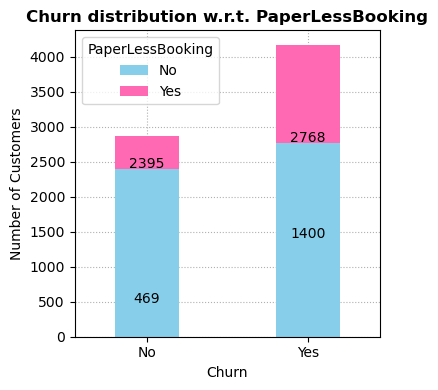

In [32]:
PLB_churn = data.groupby(['PaperlessBilling', 'Churn']).size().unstack(fill_value=0)
color_map = {"Yes": 'hotpink', "No": 'skyblue'}

PLB_churn.plot(kind='bar', stacked = True, figsize=(4,4), width=0.4, zorder = 2, color = color_map, )

for i in PLB_churn.columns:
    for j in range(len(PLB_churn)):
        plt.text(j, PLB_churn[i].iloc[j]+10, 
                 PLB_churn[i].iloc[j], ha='center')

plt.title("Churn distribution w.r.t. PaperLessBooking", fontweight='bold')

plt.grid(visible= True, ls =":", zorder = 1)
plt.xlabel("Churn")
plt.ylabel("Number of Customers")

plt.xticks(rotation=0)
plt.legend(title="PaperLessBooking", loc = 'upper left')

plt.tight_layout()
plt.show()

## Churn distribution w.r.t. TechSupport

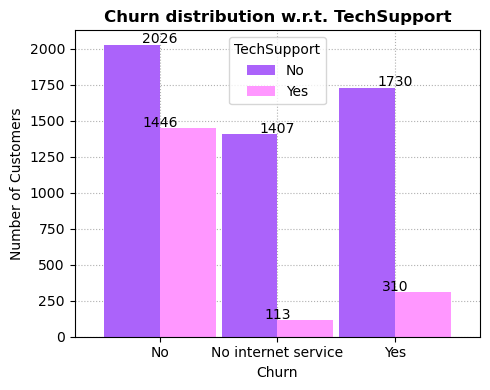

In [33]:
TS_churn = data.groupby(['TechSupport', 'Churn']).size().unstack(fill_value=0)
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}

TS_churn.plot(kind='bar', figsize=(5,4), width=0.95, zorder = 2, color = color_map, )

for i in TS_churn.columns:
    for j in range(len(TS_churn)):
        plt.text(j, TS_churn[i].iloc[j]+10, 
                 TS_churn[i].iloc[j], ha='center')

plt.title("Churn distribution w.r.t. TechSupport", fontweight='bold')

plt.grid(visible= True, ls =":", zorder = 1)
plt.xlabel("Churn")
plt.ylabel("Number of Customers")

plt.xticks(rotation=0)
plt.legend(title="TechSupport", loc = 'upper center')

plt.tight_layout()
plt.show()

In [34]:
PS_churn = data.groupby(['PhoneService', 'Churn']).size().unstack(fill_value=0)
PS_churn

Churn,No,Yes
PhoneService,,
No,510,170
Yes,4653,1699


## Churn distribution w.r.t. PhoneService

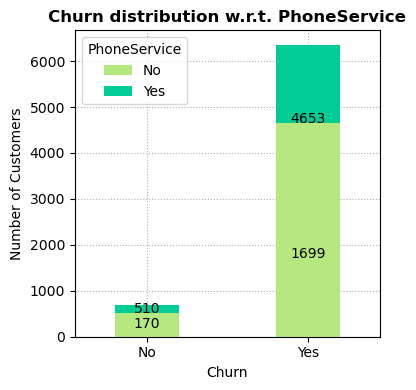

In [35]:
PS_churn = data.groupby(['PhoneService', 'Churn']).size().unstack(fill_value=0)
color_map = {"Yes": '#00CC96', "No": '#B6E880'}

PS_churn.plot(kind='bar', stacked = True, figsize=(4,4), width=0.4, zorder = 2, color = color_map, )

for i in PS_churn.columns:
    for j in range(len(PS_churn)):
        plt.text(j, PS_churn[i].iloc[j]+10, 
                 PS_churn[i].iloc[j], ha='center')

plt.title("Churn distribution w.r.t. PhoneService", fontweight='bold')

plt.grid(visible= True, ls =":", zorder = 1)
plt.xlabel("Churn")
plt.ylabel("Number of Customers")

plt.xticks(rotation=0)
plt.legend(title="PhoneService", loc = 'upper left')

plt.tight_layout()
plt.show()

## CHURN in KDE plot

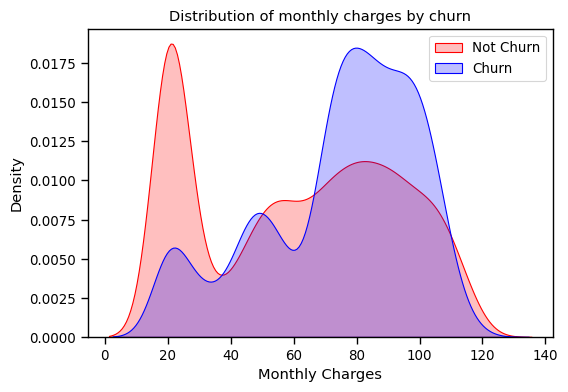

In [40]:
sns.set_context("paper",font_scale=1.1)

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

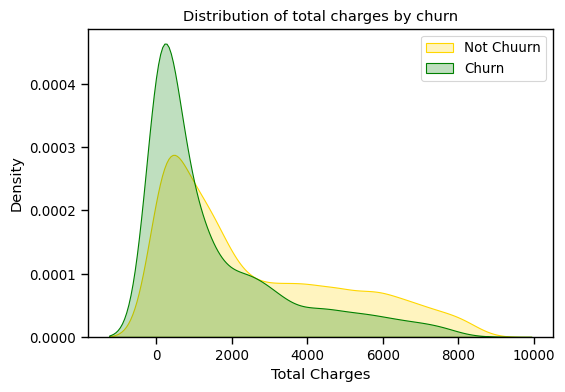

In [41]:
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chuurn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');